### Important thing while playing with data
- Understand the data
- Clean the data
- Find relationship 

In [116]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [117]:
# import the raw data 
kashti = sns.load_dataset('titanic')
kashti.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [118]:
#Saving loaded data into local drive
kashti.to_csv('kashti.csv')

In [119]:
#show all infor in kashti data
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [120]:
ks = kashti
ks.head(2)
#ks.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [121]:
# check rows and columns in ks data
ks.shape

(891, 15)

In [122]:
#info for numerical data
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
#find unique values(more values in a column show numeric, less can be catagorical values like 'who')
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [124]:
#column names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Assignment: Find unique value more than one column

In [125]:
#check unique value in any column containing string values
#ks.columns[['who','']].unique()
np.unique(ks[['who', 'sex' ,'class', 'alive']].values)

array(['First', 'Second', 'Third', 'child', 'female', 'male', 'man', 'no',
       'woman', 'yes'], dtype=object)

In [126]:
#check unique value in any column containing num values
np.unique(ks[['survived', 'pclass', 'sibsp']].values)

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

#### Clean and filter the data 

In [127]:
#Find missing values in data
#ks.isnull() # where "True" indicates Null
ks.isnull().sum() #it sums the null values in any columns

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [128]:
#drop columns/rows which contains maximum null value. here is deck

ks.drop(['deck'], axis = 1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [129]:
#assing after droping to a new veriable
ks_clean = ks.drop(['deck'], axis = 1)

In [130]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [131]:
# drop 177 from age instead removing all ages and check shape
ks_clean = ks_clean.dropna()


In [132]:
#no more any null values in data now
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [133]:
#cound value in any column
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [134]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#### Find outers

In [135]:
#find out outers. 
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

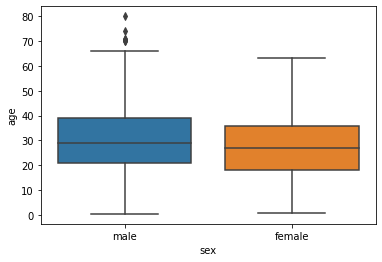

In [136]:
sns.boxplot(x = 'sex', y = 'age', data = ks_clean)

<AxesSubplot:ylabel='age'>

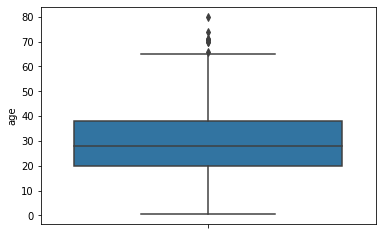

In [137]:
#outliers in age data
sns.boxplot( y = 'age', data = ks_clean)

C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

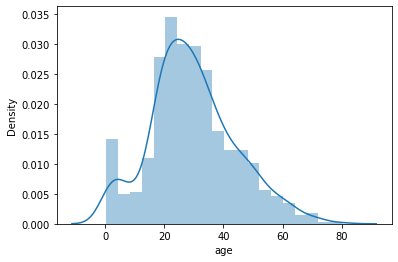

In [138]:
sns.distplot(ks_clean['age'])

In [149]:
#remove outliers 
ks['age'] = ks_clean['age'] <68
ks.mean()
ks_clean['age'].mean()

29.21797163120567

In [151]:
ks['age'].mean()

1.0

In [152]:
#still age is in boolion 
ks_clean = ks_clean[ks_clean['age'] < 68]
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,True,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,True,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,True,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,True,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,True,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [158]:
#now ok
s_clean = ks_clean[ks_clean['age']<68]
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [159]:
ks_clean.shape

(705, 14)

In [160]:
ks_clean.mean()

survived       0.407092
pclass         2.245390
age           29.217972
sibsp          0.517730
parch          0.435461
fare          34.610921
adult_male     0.575887
alone          0.561702
dtype: float64

C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

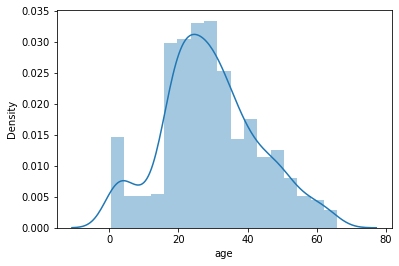

In [162]:
sns.distplot(ks_clean['age'])

<AxesSubplot:ylabel='age'>

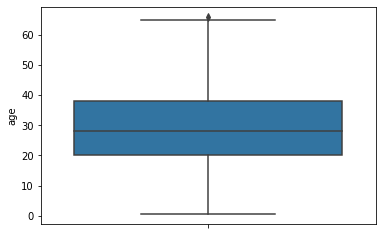

In [163]:
sns.boxplot( y = 'age', data = ks_clean)

<AxesSubplot:>

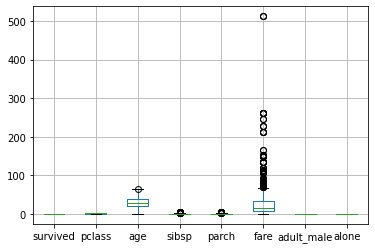

In [165]:
#check outers throughout
ks_clean.boxplot()

In [167]:
#removing fare outer value
ks_clean = ks_clean[ks_clean['fare'] < 300]

<AxesSubplot:>

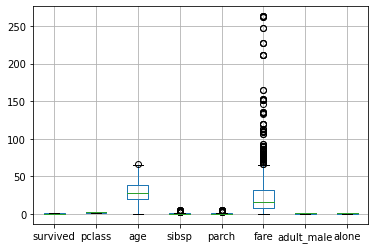

In [168]:
ks_clean.boxplot()

C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

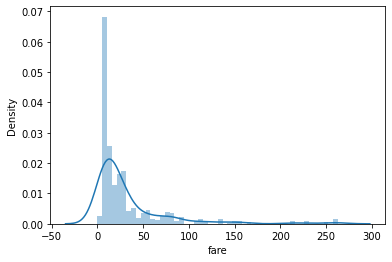

In [171]:
sns.distplot(ks_clean['fare'])

<AxesSubplot:>

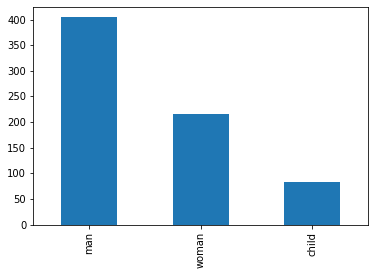

In [184]:
#create bar plots (for any column)
pd.value_counts(ks_clean['who']).plot.bar()

In [ ]:
#view by group with mean  (nan means no man in female sex)
ks_clean.groupby(['sex', 'class', 'who']).mean()

#### find coorelation

In [193]:
ks_clean.corr()
cor_ks_clean =ks_clean.corr()

<AxesSubplot:>

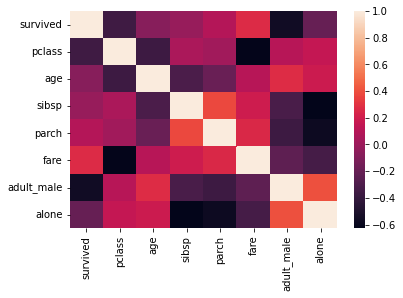

In [194]:
sns.heatmap(cor_ks_clean)

<AxesSubplot:>

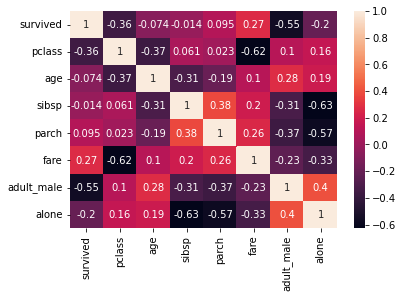

In [198]:
sns.heatmap(cor_ks_clean, annot = True)


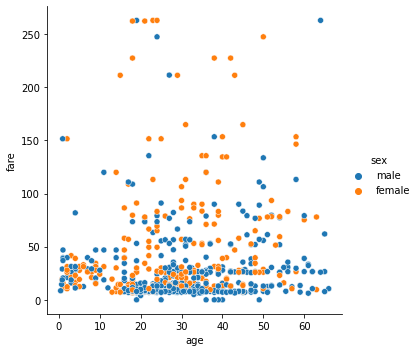

In [200]:
#plot to find coorelation
sns.relplot(x = 'age', y = 'fare', data = ks_clean)

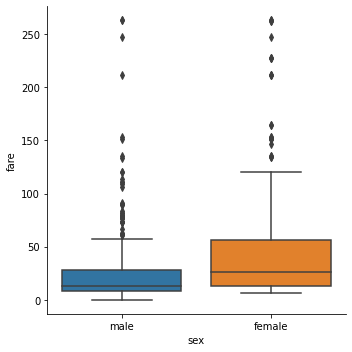

In [221]:
sns.catplot(x ='sex', y = 'fare', data = ks_clean, kind= 'box')

C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


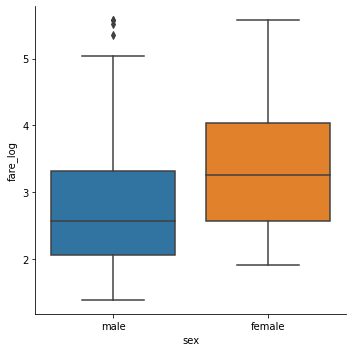

In [220]:
#log transformation 
ks_clean['fare_log']=np.log(ks_clean['fare'])
sns.catplot(x ='sex', y = 'fare_log', data = ks_clean, kind= 'box')